In [1]:
import pandas as pd

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
#from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV

In [2]:
target='Disbursed'
IDcol = 'ID'

In [3]:
train = pd.read_csv('train_modified.csv')

predictors = [x for x in train.columns if x not in [target, IDcol]]

In [5]:
train.columns,test

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

In [4]:
model = xgb.XGBClassifier()
# one hot encoding should be done as preparatory steps
# predictors is the name of columns for X
# Disbursed is the target column name

In [5]:
model.fit(train[predictors], train['Disbursed'],eval_metric='auc')
print(model)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [6]:
# make predictions for test data
y_pred = model.predict(train[predictors])
y_predprob = model.predict_proba(train[predictors])[:,1]

#predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [7]:
   print ("Accuracy : %.4g" % metrics.accuracy_score(train['Disbursed'].values, y_pred))
   print ("AUC Score (Train): %f" % metrics.roc_auc_score(train['Disbursed'], y_predprob))


Accuracy : 0.9854
AUC Score (Train): 0.851058


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#fscore = model.get_booster().get_score(importance_type='weight')
fscore = pd.Series(model.get_booster().get_score(importance_type='weight'))
fscore.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


In [9]:
test = pd.read_csv('test_modified.csv')

test_predictors = [x for x in train.columns if x not in [target, IDcol]]

(array([    0.,     0.,     0.,     0.,     0., 37717.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

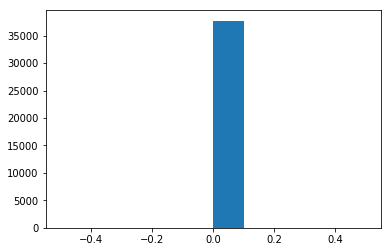

In [10]:
import matplotlib.pyplot as plt
plt.hist(model.predict(test[test_predictors]))

In [11]:
def modelpred(alg, dtest, predictors):
        
    #Predict training set:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
    return dtest_predictions,dtest_predprob

In [12]:
val1,val2=modelpred(model, test, test_predictors)

In [16]:
val1.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'